In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

Matplotlib is building the font cache; this may take a moment.


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


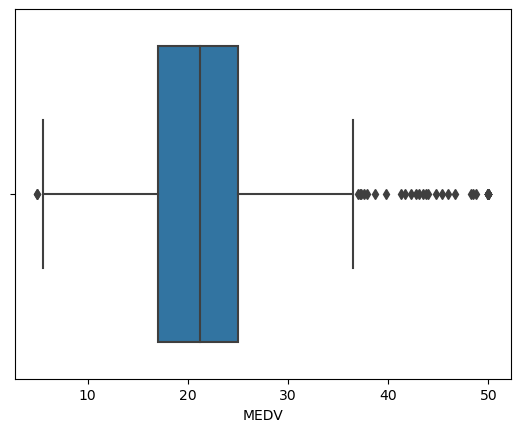

In [6]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

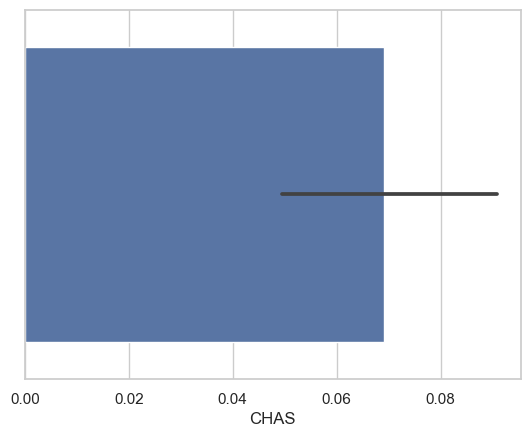

In [7]:
#Provide a  bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)
plt.show()

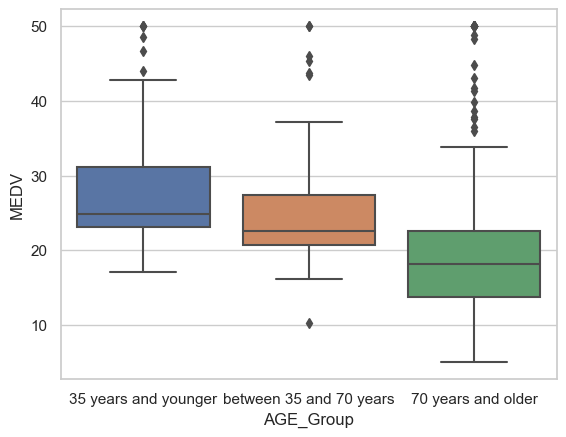

In [9]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

ax = sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.show()

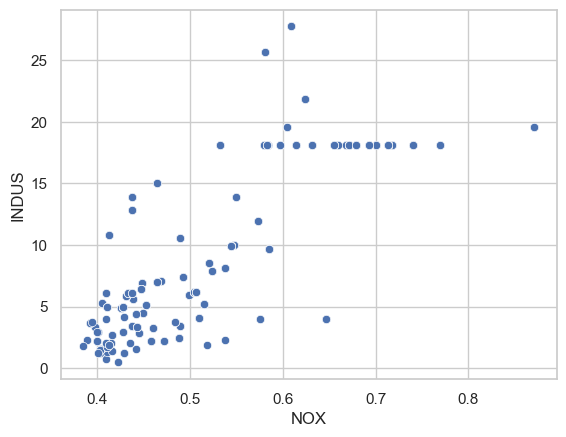

In [10]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

C:\Users\950226\AppData\Local\Temp\ipykernel_8640\176551417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


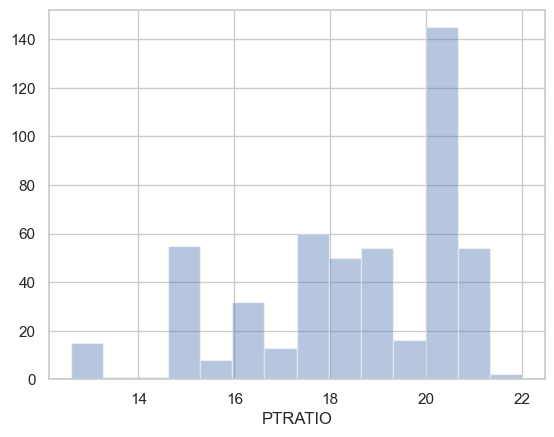

In [11]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.show()

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS']== 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS']== 0]['MEDV'], equal_var=False)


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

In [14]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV'], 
                   center='mean')

C:\Users\950226\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\950226\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [15]:
# There is equal variance

# Assign the variables for the ANOVA
age1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
age2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'] 
age3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

# ANOVA
f_statistic, p_value = scipy.stats.f_oneway(age1, age2, age3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

## CONCLUSION: P-value is below the Alpha, we reject the Ho

F_Statistic: nan, P-Value: nan


C:\Users\950226\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


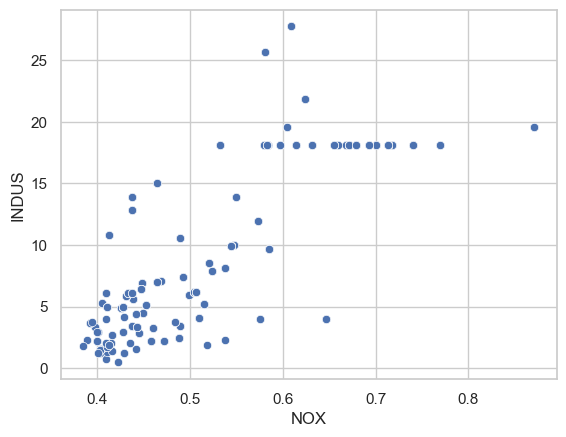

In [16]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# First, the let's get a rough look at the correlation and we can copy and paste it from the above
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

In [17]:
# Looks like there could be a positive correlation

# Pearson Correlation Test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

## CONCLUSION: P-value is below the Alpha, we reject the Ho

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

In [18]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
## Null Hypothesis: There is no statistically signifcant impact of an additional weighted distance to the five Boston
## employment centres on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

## CONCLUSION: P-value is below the Alpha, we reject the Ho

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        14:09:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""